Import the required Libraries

In [15]:
import pandas as pd
import numpy as np

%matplotlib inline

Load the Dataset

In [17]:
jan_2024_df = pd.read_parquet('Datasets/yellow_tripdata_2024-01.parquet')
taxi_df = pd.concat([jan_2024_df])

view data

taxi_df.head()

print the shape of the dataset

In [24]:
taxi_df.shape

(2964624, 19)

view the colum's

In [27]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [29]:
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'payment_type', 
                   'PULocationID', 'DOLocationID', 'total_amount']]

In [31]:
taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,2,186,79,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,1,140,236,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,1,236,79,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,1,79,211,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,1,211,148,16.10


visualizing data through histograms

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

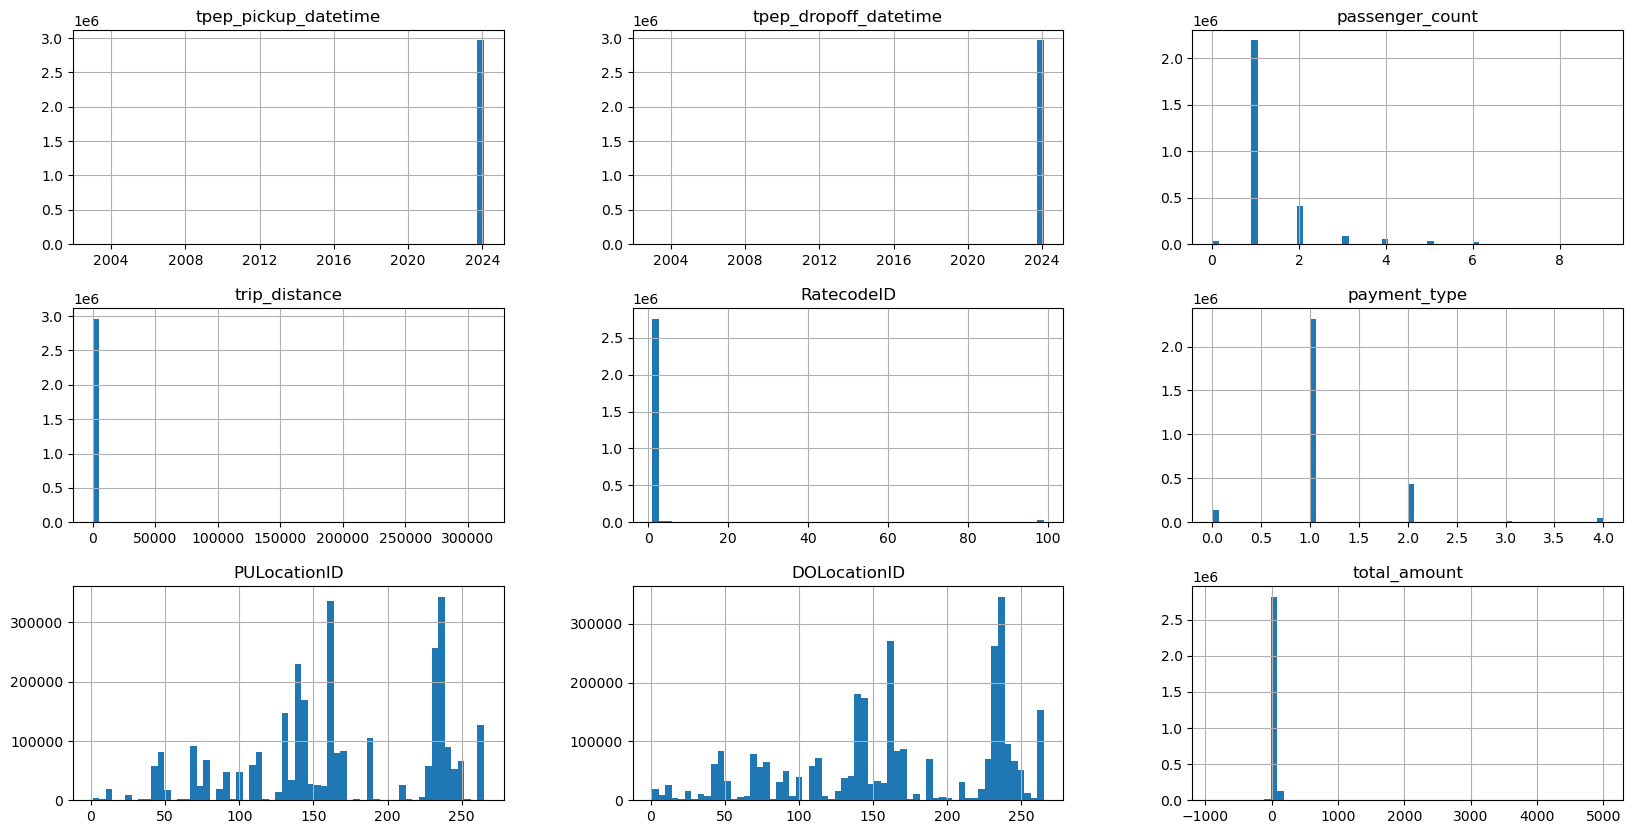

In [38]:
taxi_df.hist(figsize=(20,10), bins=60)

analysing the histogram

In [53]:
taxi_df['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

In [55]:
taxi_df['total_amount'].value_counts()

total_amount
16.80     45432
12.60     43275
21.00     36556
15.12     26687
15.96     26396
          ...  
584.18        1
323.28        1
201.93        1
128.09        1
118.96        1
Name: count, Length: 19241, dtype: int64

total amount column is not properly distributed, 

<Axes: xlabel='index', ylabel='total_amount'>

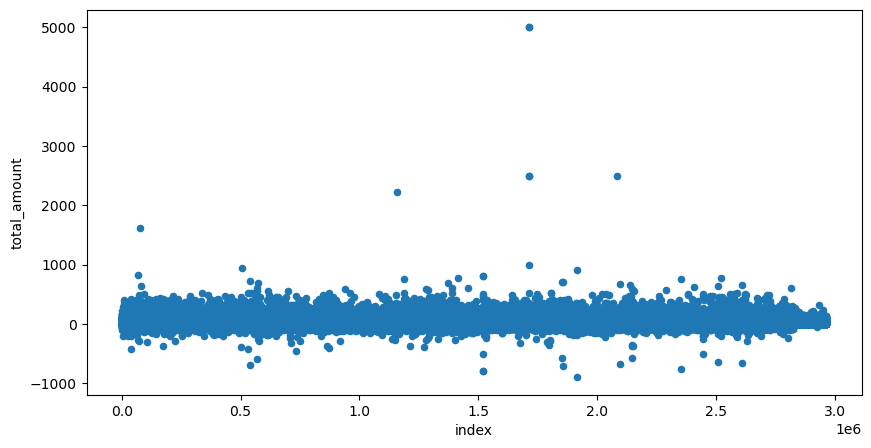

In [60]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

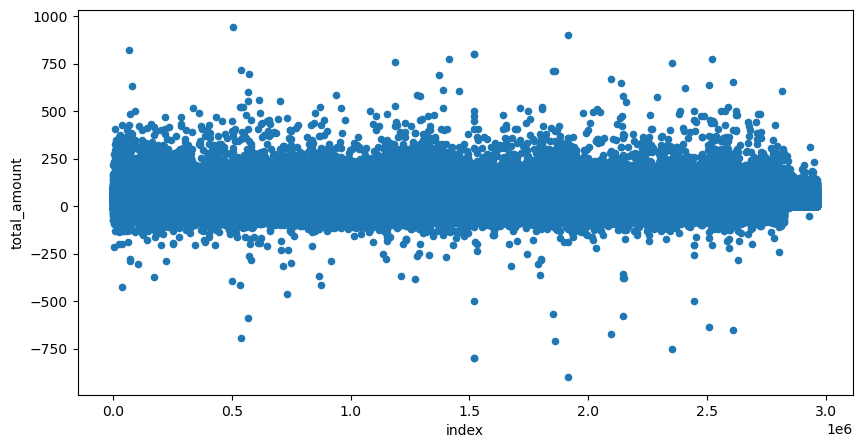

In [66]:
taxi_df[taxi_df['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

there are two things to deal with negative values and very large values, for now we are dealing with negative values.

In [73]:
taxi_df[taxi_df['total_amount']<0].shape

(35504, 9)

plotting the values which are lesser than 0 (Negative values)

<Axes: xlabel='index', ylabel='total_amount'>

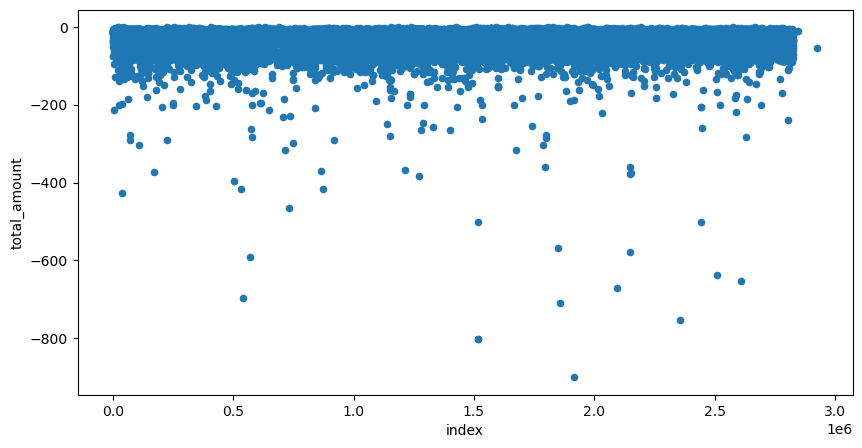

In [78]:
taxi_df[taxi_df['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [80]:
taxi_df[taxi_df['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,4,249,232,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,2,63,63,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,4,249,113,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,2,107,61,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,4,90,225,-52.80


In [82]:
taxi_df[taxi_df['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

<Axes: >

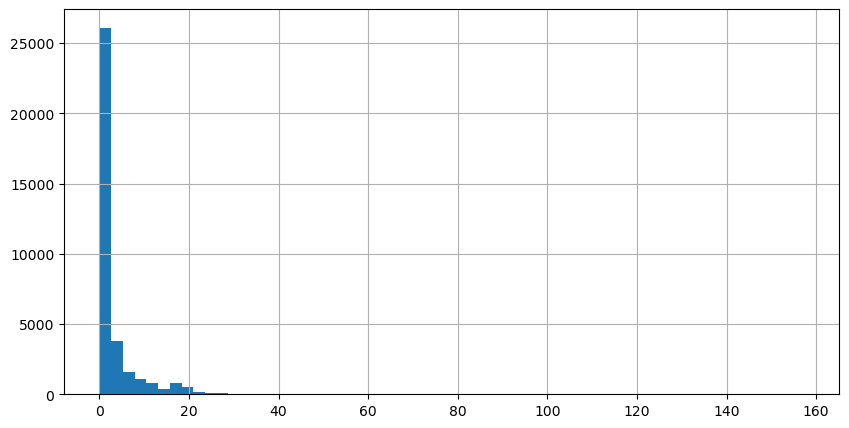

In [88]:
taxi_df[taxi_df['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [92]:
taxi_df[taxi_df['total_amount']==0].shape

(416, 9)

In [94]:
taxi_df[taxi_df['total_amount']==0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
854,2024-01-01 00:27:42,2024-01-01 00:28:49,1.0,0.2,1.0,4,239,143,0.0
29224,2024-01-01 10:01:27,2024-01-01 10:01:27,1.0,0.0,5.0,2,239,264,0.0
39191,2024-01-01 13:46:41,2024-01-01 14:12:06,1.0,0.0,99.0,1,42,216,0.0
39591,2024-01-01 13:03:22,2024-01-01 13:03:24,1.0,0.0,1.0,2,264,264,0.0
39592,2024-01-01 13:05:28,2024-01-01 13:05:35,1.0,0.0,1.0,2,193,193,0.0


In [102]:
taxi_df[taxi_df['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
1.10       4
0.30       4
1.30       4
0.60       4
0.40       3
3.00       3
2.50       3
2.40       2
3.40       2
3.80       2
1.80       2
1.70       2
10.70      2
12.10      1
25.10      1
1.40       1
12.80      1
1.74       1
2.70       1
18.40      1
15.00      1
5.30       1
3.30       1
2.90       1
17.10      1
4.20       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
7.00       1
Name: count, dtype: int64

<Axes: >

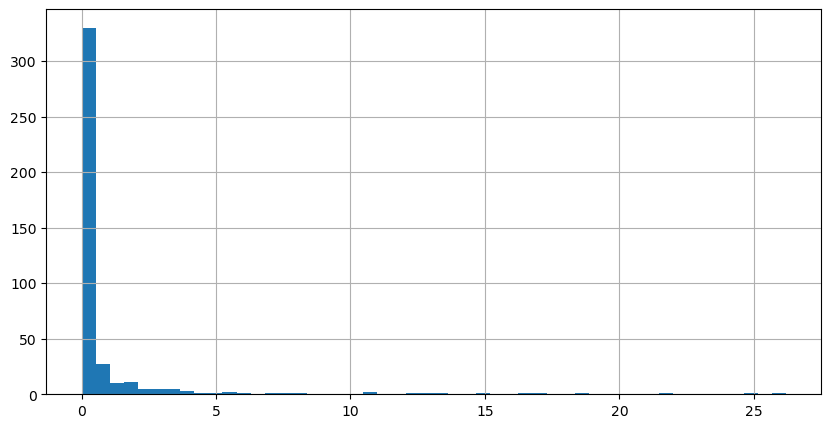

In [96]:
taxi_df[taxi_df['total_amount']==0]['trip_distance'].hist(bins=50, figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

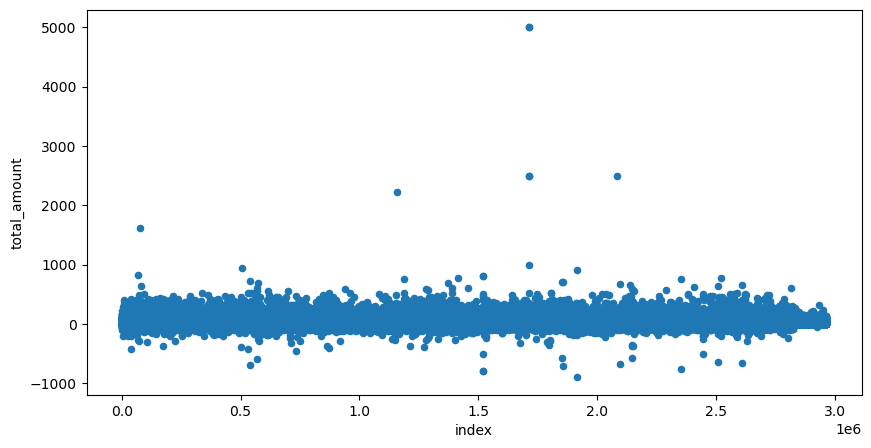

In [106]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [124]:
taxi_df[taxi_df['total_amount']>210].shape

(1693, 9)

average value what people are spending on a taxi

In [127]:
taxi_df['total_amount'].mean()

26.801504770925415